In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ERG-131] Homework 2: Pandas EPA Air Quality

---

## Table of Contents
[Introduction](#intro)<br>
1 - [Downloading the Data](#data)<br>
2 - [Preparing the Data](#prep)<br>
3 - [Exploring Data with Pandas](#explore)<br>
4 - [California Data](#cadata)<br>

# Introduction <a id='intro'></a>

In this homework, we will investigate air quality data retreived from the EPA, focusing on using Pandas to analyze particulate matter (PM2.5) levels.

### Topics Covered

As we clean and explore these data, you will gain practice with:
* Manipulating tables and parts of the table (column, index)
* Identifying the type of data collected, missing values, anomalies, etc.
* Computing numeric operations (mean, variance)
* Merging and analyzing data sets

----

## Section 1: Downloading the Data<a id='data'></a>

Run the cell below to import some of the packages we will need for this assignment:

In [41]:
#Run this cell
from pathlib import Path
import sys
import math
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

**Question 1.1:** Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`).  

In [3]:
## YOUR CODE HERE
import numpy as np
import pandas as pd

We'll be working with air quality data from the EPA. Have a look at the description of the data  [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_hourly_data_files).

For this homework, we'll focus on PM2.5 Mass data from 2018. Although it's possible to download the dataset exclusively through the notebook environment, the dataset is too large (over 4 million rows, 1.3GB!) to load and process in DataHub given the memory constraint. Thus, we'll work with a preprocessed, reduced version of this dataset that removes readings from certain states that we will not be working with.**


**For your future reference, the raw data can be downloaded from [this website](https://aqs.epa.gov/aqsweb/airdata/download_files.html). Alternatively, you can directly download a zipfile using a URL in the following form:

https://aqs.epa.gov/aqsweb/airdata/hourly_TYPE_YEAR.zip

...replacing "TYPE" and "YEAR" with the measurement and year, respectively, that you want to analyze.

**Measurement | (TYPE)**  
Ozone | (44201)  
SO2 | (42401)  
CO | (42101)  
NO2 | (42602)  
PM2.5 FRM/FEM Mass | (88101)  
PM2.5 non FRM/FEM Mass | (88502)  
PM10 Mass | (81102)  
PM2.5 Speciation | (SPEC)  
PM10 Speciation | (PM10SPEC)

Let's start by using Python to unzip the folder and see how many files it contains:

In [4]:
air_quality_path = Path('data/reduced_PM25_2018.zip')
zf = zipfile.ZipFile(air_quality_path, 'r')
print([f.filename for f in zf.filelist])

['reduced_PM25_2018.csv']


We see that there is only one CSV file within the zip file. From here, we want to then get a sense of the structure of the data within the CSV.

**Question 1.2:** Read the CSV file from the zip.

In [5]:
f_name = 'reduced_PM25_2018.csv'  # YOUR CODE HERE
with zf.open(f_name) as f:
    for i in range(2):
        print(f.readline().rstrip().decode())

State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,00:00,2018-01-01,08:00,62.0,Micrograms/cubic meter (LC),5.0,,,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta Attenuation,California,Alameda,2018-03-28


**Question 1.3:** In the code above, what does `i` represent in the `for` statement? (In other words, what is the `for` statement iterating over?)

*YOUR ANSWER HERE*

*The loop is iterating over rows (in this case, the first two rows) within the CSV file.*

#### We can then organize this data and read it more easily by putting it in a table! We will go over this in the next section.

----

## Section 2: Preparing the Data<a id='prep'></a>

We can see that the file contains a pretty descriptive header, and in fact the columns are explained in detail in the documentation at the url listed at the top of this notebook. Let's extract the data into a Pandas dataframe. We will keep using `zf` to read the file and extract the information.  

In [6]:
with zf.open(f_name) as fh:
    PM25_2018 = pd.read_csv(fh, low_memory = False)

In [42]:
PM25_2018.loc[(PM25_2018['Site Num']==7)&(PM25_2018['POC']==3)]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,00:00,2018-01-01,08:00,62.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
1,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,01:00,2018-01-01,09:00,57.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
2,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,02:00,2018-01-01,10:00,62.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
3,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,03:00,2018-01-01,11:00,48.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
4,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,04:00,2018-01-01,12:00,63.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
5,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,05:00,2018-01-01,13:00,50.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
6,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,06:00,2018-01-01,14:00,34.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
7,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,07:00,2018-01-01,15:00,45.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
8,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,08:00,2018-01-01,16:00,20.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
9,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,09:00,2018-01-01,17:00,23.0,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28


In [7]:
PM25_2018.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
1,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
2,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
3,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
4,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28


**Question 2.1:** Look through the dataframe. Name three data types that it holds. 

*YOUR ANSWER HERE*

*The dataframe cotains integer, float, and string data types. (Also accepted nominal, ordinal, and numeric data types).*

**Question 2.2:** Identify at least one issue relating to questionable or missing data in the dataframe, and outline (in one sentence) how this data-related issue could impact an analyst's ability to draw conclusions from the data. 

*YOUR ANSWER HERE*

*Answers can vary, but one answer is: the air quality uncertainty field ("Uncertainty") contains a lot of NaNs, which would make it difficult to compare air quality at different times or in different locations with any certainty.*

**Question 2.3:** Answer the questions below. (*Hint*: the method `.shape` might be helpful for answering the first two questions.)

1. How many records are present?
2. How many fields are reported?
3. What does each row represent?
4. After reading up on the data formats [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_hourly_data_files), what does MDL stand for and what is it?

In [8]:
# use this cell for scratch work
PM25_2018.shape

(813317, 24)

*YOUR ANSWER HERE*

*There are 813,317 records and 24 fields (corresponding to the number of rows and columns in the dataframe). Each row is a PM2.5 measurement at a given hour and monitor location. MDL stands for Method Detection Limit, the minimum concentration that the monitor and method used at a given station can measure.*

**Question 2.4:** What percentage of the records in the PM25_2018 dataframe have a smaller sample measurement than they do an MDL value? Are you more or less confident in those values than you are in the sample measurement values in the rest of the dataset? Why?

In [9]:
# use this cell for scratch work
under_MDL = len(PM25_2018[PM25_2018["Sample Measurement"]<PM25_2018["MDL"]])
under_MDL / len(PM25_2018) * 100

26.928860456623926

*YOUR ANSWER HERE*

*The sample measurement is lower than the MDL for about 27% of records. We would have less confidence in those values, since they fall below the lower limit for which the monitor can provide reliable information.*

**Question 2.5:** How many unique states are represented in `PM25_2018`? Which ones are they?

In [10]:
# scratch work here
unique_codes = PM25_2018["State Name"].unique()
print(unique_codes)
len(unique_codes)

['California' 'Hawaii' 'Nebraska' 'New York' 'Puerto Rico']


5

*YOUR ANSWER HERE*

*Five states (California, Hawaii, Nebraska, New York, and Puerto Rico) are represented in the dataframe.*

**Question 2.6:** We can see that there are a lot of columns that are unnecessary for this data analysis. Let's make a new dataframe with the information we need. Use pd.DataFrame to create a new table with 7 columns, named and ordered as follows:
1. `State`: The name of the state where the monitoring site is located.
1. `County`: The name of the county where the monitoring site is located.
1. `Date`: The column of dates corresponding to the `Date Local` column.
1. `Time`: The time of day that sampling began on a 24-hour clock, corresponding to the `Time Local` column.
1. `Measurement`: The measured value in the standard units of measure for the parameter corresponding to the `Sample Measurement` column.
1. `Units`: The unit of measure for the parameter corresponding to the `Units of Measure` column.
1. `MDL`: the method detection limit for the measurement.

In [11]:
# YOUR CODE HERE

state_table = pd.DataFrame(columns = ["State", "County","Date", "Time", "Measurement", "Units","MDL"])

state_table["Date"]= PM25_2018["Date Local"]
state_table["Time"]= PM25_2018["Time Local"]
state_table["Measurement"]= PM25_2018["Sample Measurement"]
state_table["Units"]= PM25_2018["Units of Measure"]
state_table["State"]= PM25_2018["State Name"]
state_table["County"]= PM25_2018["County Name"]
state_table["MDL"] = PM25_2018["MDL"]

In [12]:
state_table.iloc[80:90,:]

,State,County,Date,Time,Measurement,Units,MDL
80,California,Alameda,2018-01-04,09:00,38.0,Micrograms/cubic meter (LC),5.0
81,California,Alameda,2018-01-04,10:00,31.0,Micrograms/cubic meter (LC),5.0
82,California,Alameda,2018-01-04,11:00,30.0,Micrograms/cubic meter (LC),5.0
83,California,Alameda,2018-01-04,12:00,25.0,Micrograms/cubic meter (LC),5.0
84,California,Alameda,2018-01-04,13:00,9.0,Micrograms/cubic meter (LC),5.0
85,California,Alameda,2018-01-04,14:00,5.0,Micrograms/cubic meter (LC),5.0
86,California,Alameda,2018-01-04,15:00,1.0,Micrograms/cubic meter (LC),5.0
87,California,Alameda,2018-01-04,16:00,1.0,Micrograms/cubic meter (LC),5.0
88,California,Alameda,2018-01-04,17:00,3.0,Micrograms/cubic meter (LC),5.0
89,California,Alameda,2018-01-04,18:00,1.0,Micrograms/cubic meter (LC),5.0


**Question 2.7a:** Within the `state_table` dataframe, find any rows where "Measurement" is lower than "MDL." Replace the value in "Measurement" in those rows with `np.nan` (the `.loc` method is helpful here!).  

*Hint / Warning*: You may get a "SettingWithCopyWarning".  It's ok to ignore.  

In [13]:
# YOUR CODE HERE
state_table.loc[state_table['Measurement']<state_table['MDL'], 'Measurement'] = np.nan

In [14]:
state_table.iloc[80:90,:]

,State,County,Date,Time,Measurement,Units,MDL
80,California,Alameda,2018-01-04,09:00,38.0,Micrograms/cubic meter (LC),5.0
81,California,Alameda,2018-01-04,10:00,31.0,Micrograms/cubic meter (LC),5.0
82,California,Alameda,2018-01-04,11:00,30.0,Micrograms/cubic meter (LC),5.0
83,California,Alameda,2018-01-04,12:00,25.0,Micrograms/cubic meter (LC),5.0
84,California,Alameda,2018-01-04,13:00,9.0,Micrograms/cubic meter (LC),5.0
85,California,Alameda,2018-01-04,14:00,5.0,Micrograms/cubic meter (LC),5.0
86,California,Alameda,2018-01-04,15:00,NaN,Micrograms/cubic meter (LC),5.0
87,California,Alameda,2018-01-04,16:00,NaN,Micrograms/cubic meter (LC),5.0
88,California,Alameda,2018-01-04,17:00,NaN,Micrograms/cubic meter (LC),5.0
89,California,Alameda,2018-01-04,18:00,NaN,Micrograms/cubic meter (LC),5.0


**Question 2.7b:** We could have used a different strategy to 'clean' the measurements with values below the MDL. Why might it be a good idea to replace these measurements with "NaN" rather than setting them to another value, e.g., 0 or to the MDL? Similarly, why might we want to use "NaN" instead of removing these rows from the table entirely?

*YOUR ANSWER HERE*

*By filling questionable measurements with np.nan instead another number, we avoid creating confusion between actual measurements and "fill" values that we manually impose on the dataset and preserve our ability take statistics such as mean, max, and min values. Similarly, by using np.nan instead of deleting these rows, we retain the record (as distinct from a failure by the sensor to record a measurement) but are able to exclude its value from any calculations.* 

<br>

----

## Section 3: Exploring Data with Pandas<a id='explore'></a>

The air quality in Los Angeles, CA is notoriously poor. In this section we will analyze the EPA data to examine how air pollution varies over the course of the day.

**Question 3.1:** Using the table from Question 2.6, create a new table containing just data from Los Angeles county in California.

In [15]:
# YOUR CODE HERE
lacounty = state_table[(state_table['State']=='California') & (state_table['County']=='Los Angeles')]

In [16]:
lacounty.head(10)

,State,County,Date,Time,Measurement,Units,MDL
178050,California,Los Angeles,2018-01-01,00:00,181.9,Micrograms/cubic meter (LC),2.0
178051,California,Los Angeles,2018-01-01,01:00,245.2,Micrograms/cubic meter (LC),2.0
178052,California,Los Angeles,2018-01-01,02:00,259.0,Micrograms/cubic meter (LC),2.0
178053,California,Los Angeles,2018-01-01,03:00,240.5,Micrograms/cubic meter (LC),2.0
178054,California,Los Angeles,2018-01-01,04:00,225.4,Micrograms/cubic meter (LC),2.0
178055,California,Los Angeles,2018-01-01,05:00,206.2,Micrograms/cubic meter (LC),2.0
178056,California,Los Angeles,2018-01-01,06:00,160.5,Micrograms/cubic meter (LC),2.0
178057,California,Los Angeles,2018-01-01,07:00,147.6,Micrograms/cubic meter (LC),2.0
178058,California,Los Angeles,2018-01-01,08:00,157.4,Micrograms/cubic meter (LC),2.0
178059,California,Los Angeles,2018-01-01,09:00,114.8,Micrograms/cubic meter (LC),2.0


In [17]:
assert len(lacounty) == 15313

**Question 3.2:** Below, output all the measurements in `lacounty` taken at midnight and all the measurements taken at noon. What do you notice?  You might try using the `.describe` method to explore your midnight and noon outputs separately.

In [18]:
# measurements at midnight

#YOUR CODE HERE
la_midnight = lacounty[lacounty['Time']=='00:00']
la_midnight.describe()

,Measurement,MDL
count,508.000000,638.000000
mean,12.946260,3.697492
std,11.474416,1.488109
min,2.000000,2.000000
25%,7.000000,2.000000
50%,9.400000,5.000000
75%,15.800000,5.000000
max,181.900000,5.000000


In [19]:
# Measurements at noon

# YOUR CODE HERE
la_noon = lacounty[lacounty['Time']=='12:00']
la_noon.describe()

,Measurement,MDL
count,423.000000,625.000000
mean,11.930260,3.704000
std,11.308877,1.487254
min,2.000000,2.000000
25%,6.200000,2.000000
50%,8.700000,5.000000
75%,13.350000,5.000000
max,145.400000,5.000000


*YOUR OBSERVATIONS HERE*

**Question 3.4a:** We can also visualize this data and see how the PM2.5 concentrations fluctuate throughout the day. Start by using the `groupby` method to find the mean PM2.5 measurement for each hour of the day. The results should be a dataframe in which the indices are the 24 hours of the day (00:00 - 23:00) and the columns are `Measurement` and `MDL`.

In [20]:
# YOUR CODE HERE
la_hr = lacounty.groupby('Time').mean()

In [21]:
assert la_hr.shape == (24, 2)

**Question 3.3b:** Now, run the code in the cell below to plot the mean PM2.5 for each hour. The x-axis should be the hour of the day (00:00 - 23:00). Label the y-axis. Are there any noticeable trends in this plot?

Text(0, 0.5, 'PM2.5 (Micrograms/cubic meter (LC))')

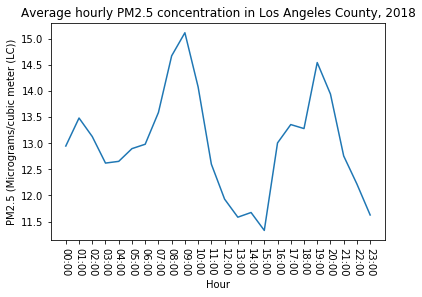

In [22]:
plt.plot(la_hr.index, la_hr['Measurement'])
plt.xticks(rotation=270)
plt.title('Average hourly PM2.5 concentration in Los Angeles County, 2018')
plt.xlabel('Hour')
plt.ylabel('PM2.5 (Micrograms/cubic meter (LC))') #YOUR CODE HERE;

*YOUR OBSERVATIONS HERE*

*One point for labeling the y-axis, one point for describing the curve. Notice the two peaks around 9am and 8pm.*

**Question 3.4a:** Use the `groupby` method on the `lacounty` dataframe once again, but this time, use the standard deviation (`std()`) aggregation function. 

In [23]:
# YOUR CODE HERE
la_hr_stdev = lacounty.groupby('Time').std()
la_hr_stdev

,Measurement,MDL
Time,,
00:00,11.474416,1.488109
01:00,13.498369,1.489795
02:00,14.001677,1.490429
03:00,13.043217,1.489795
04:00,12.317326,1.489795
05:00,11.423250,1.489795
06:00,9.932586,1.489795
07:00,11.441932,1.489727
08:00,12.655242,1.488993


**Question 3.4b:** Run the code below to plot the standard deviation on the same graph as the mean data. Label the y-axis and title the plot. Record your observations.

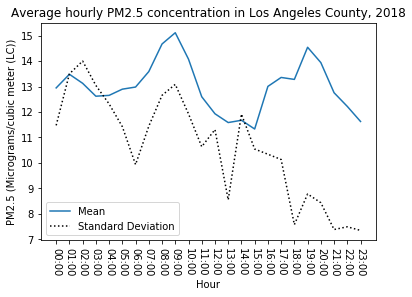

In [24]:
plt.plot(la_hr.index, la_hr['Measurement'], label = 'Mean')
plt.plot(la_hr_stdev.index, la_hr_stdev['Measurement'], 'k:', label = 'Standard Deviation')
plt.xticks(rotation=270)
plt.title('Average hourly PM2.5 concentration in Los Angeles County, 2018') #YOUR CODE HERE
plt.xlabel('Hour')
plt.ylabel('PM2.5 (Micrograms/cubic meter (LC))') #YOUR CODE HERE
plt.legend();

*YOUR OBSERVATIONS HERE*

*One point for labelling the title and y-axis, one point for making an observation about the standard deviation.*

**Question 3.5:** Do the data support the hypothesis that PM2.5 concentrations follow a diurnal pattern? Why or why not? What are some of the limitations of either our data or the methods we've used to explore it so far in allowing us to observe hourly trends?

*YOUR ANSWER HERE*

*A variety of answers were accepted here. Key points: looking only at the means, there does appear to be a diurnal pattern (two peaks roughly corresponding to rush hour), but the high standard deviation calls into question any inference we could make looking at mean alone. Limitations: we aren't analyzing seasons, weekends versus weekdays, weather or fire conditions...*

**Question 3.6:** In Susan Athey's essay "Beyond Prediction", Athey defines the distinction between prediction problems and causal inference problems. Thinking about this air quality dataset, can you come up with one question that poses a prediction problem (also referred to a resource allocation problem in the essay) and another that poses a causal inference problem? The two questions you come up with should be air quality related, but you don't have to limit yourself to this dataset (eg. it's totally fair to come up with a question that would also incorporate, for example, census or demographic data).

*YOUR ANSWER HERE*

*A variety of answers were accepted here, but the wording of the prediction question needed to make it clear that the focus is on the response variable (i.e., air pollution) rather than the predictor (e.g., traffic, point sources). Full credit answers asked a resource allocation question, e.g., "Where and when should we target a program distributing free N95 masks?"*

----

## Section 4: California Data<a id='cadata'></a>

Let's explore the dynamics of wildfire and air quality. In this section, we will use data analysis to see how a major wildfire impacted PM2.5 cocentrations in Alameda County. 

<br>**Question 4.1:** Create a dataframe called `PM25_2018_CA` that is a subset of `state_table` and just has PM2.5 2018 California data.

In [25]:
# YOUR CODE HERE
PM25_2018_CA = state_table[state_table["State"] == "California"]

In [26]:
PM25_2018_CA.head()

,State,County,Date,Time,Measurement,Units,MDL
0,California,Alameda,2018-01-01,00:00,62.0,Micrograms/cubic meter (LC),5.0
1,California,Alameda,2018-01-01,01:00,57.0,Micrograms/cubic meter (LC),5.0
2,California,Alameda,2018-01-01,02:00,62.0,Micrograms/cubic meter (LC),5.0
3,California,Alameda,2018-01-01,03:00,48.0,Micrograms/cubic meter (LC),5.0
4,California,Alameda,2018-01-01,04:00,63.0,Micrograms/cubic meter (LC),5.0


<br>**Question 4.2:** Use `groupby` to find the maximum PM2.5 concentration in each county in 2018. 

In [27]:
# YOUR CODE HERE
county_max = PM25_2018_CA.groupby(["County"]).max()
county_max['Measurement'].sort_values(ascending=False)

County
Inyo               1248.9
Monterey            657.0
Mono                553.2
Nevada              503.0
Sacramento          494.0
Santa Clara         482.0
Alameda             393.0
Stanislaus          354.0
Mendocino           345.0
San Joaquin         305.0
Contra Costa        302.0
Ventura             279.0
Sonoma              266.0
San Diego           264.0
Siskiyou            263.0
Colusa              260.0
Los Angeles         259.0
San Benito          253.0
Solano              245.0
Fresno              243.0
San Francisco       241.0
Santa Cruz          231.0
Riverside           220.0
Marin               218.0
Calaveras           199.0
Tehama              196.0
San Bernardino      187.3
San Mateo           181.0
San Luis Obispo     178.0
Napa                173.0
Placer              163.0
Madera              143.3
Merced              140.0
Kings               136.2
Santa Barbara       136.0
Kern                 97.0
Del Norte            61.5
Name: Measurement, dtype: float

----
The Camp Fire, which started on November 8, 2018, was described as the [‘deadliest, most destructive wildfire in California history’](https://www.washingtonpost.com/nation/2018/11/25/camp-fire-deadliest-wildfire-californias-history-has-been-contained/?noredirect=on).

UC Berkeley students could smell and see the effects of the fires in Butte County; classes were cancelled on November 15 due to poor air quality.

**Question 4.3:** Using `PM25_2018_CA`, create a table containing just information from Alameda County on November 15, 2018.

In [28]:
# YOUR CODE HERE
ac_nov15 = PM25_2018_CA[(PM25_2018_CA["County"] == "Alameda") & (PM25_2018_CA["Date"] == "2018-11-15")]

In [29]:
ac_nov15.head()

,State,County,Date,Time,Measurement,Units,MDL
7465,California,Alameda,2018-11-15,00:00,135.0,Micrograms/cubic meter (LC),5.0
7466,California,Alameda,2018-11-15,01:00,143.0,Micrograms/cubic meter (LC),5.0
7467,California,Alameda,2018-11-15,02:00,143.0,Micrograms/cubic meter (LC),5.0
7468,California,Alameda,2018-11-15,03:00,163.0,Micrograms/cubic meter (LC),5.0
7469,California,Alameda,2018-11-15,04:00,165.0,Micrograms/cubic meter (LC),5.0


**Question 4.4:** Using `PM25_2018_CA`, create a table containing just information from Alameda County on November 7, 2018.

In [34]:
# YOUR CODE HERE
ac_nov7 = PM25_2018_CA[(PM25_2018_CA["County"] == "Alameda") & (PM25_2018_CA["Date"] == "2018-11-07")]

In [35]:
ac_nov7.head()

,State,County,Date,Time,Measurement,Units,MDL
7273,California,Alameda,2018-11-07,00:00,6.0,Micrograms/cubic meter (LC),5.0
7274,California,Alameda,2018-11-07,01:00,5.0,Micrograms/cubic meter (LC),5.0
7275,California,Alameda,2018-11-07,02:00,NaN,Micrograms/cubic meter (LC),5.0
7276,California,Alameda,2018-11-07,03:00,NaN,Micrograms/cubic meter (LC),5.0
7277,California,Alameda,2018-11-07,04:00,NaN,Micrograms/cubic meter (LC),5.0


**Question 4.5:** Merge `napa_nov15` and `napa_nov7` on `Time` to compare their PM2.5 concentrations side by side.

*Note:* If  two dataframes have the same column names when pandas executes a merge, it will append a '_x' to the first dataframe'S column names and a '_y' to the second dataframe's column names.  The rename operation is meant to clarify things.  Be sure that it's renaming correctly!

In [36]:
ac_merge = ac_nov15.merge(ac_nov7, on = ["Time"]) # YOUR CODE HERE
ac_merge.rename(columns={'Measurement_x':'Nov15 PM2.5', 'Measurement_y':'Nov7 PM2.5'}, inplace = True)
ac_merge.head()

,State_x,County_x,Date_x,Time,Nov15 PM2.5,Units_x,MDL_x,State_y,County_y,Date_y,Nov7 PM2.5,Units_y,MDL_y
0,California,Alameda,2018-11-15,00:00,135.0,Micrograms/cubic meter (LC),5.0,California,Alameda,2018-11-07,6.0,Micrograms/cubic meter (LC),5.0
1,California,Alameda,2018-11-15,00:00,135.0,Micrograms/cubic meter (LC),5.0,California,Alameda,2018-11-07,NaN,Micrograms/cubic meter (LC),5.0
2,California,Alameda,2018-11-15,00:00,135.0,Micrograms/cubic meter (LC),5.0,California,Alameda,2018-11-07,16.0,Micrograms/cubic meter (LC),5.0
3,California,Alameda,2018-11-15,00:00,135.0,Micrograms/cubic meter (LC),5.0,California,Alameda,2018-11-07,7.0,Micrograms/cubic meter (LC),5.0
4,California,Alameda,2018-11-15,00:00,135.0,Micrograms/cubic meter (LC),5.0,California,Alameda,2018-11-07,11.0,Micrograms/cubic meter (LC),5.0


**Question 4.7:** Calculate the mean PM2.5 measurement on both days. Using [EPA's air quality index](https://www.airnow.gov/aqi/aqi-basics/), comment on the relative level of health concern for each day.

In [37]:
# YOUR CODE HERE
print("Nov 15 mean: ", ac_merge["Nov15 PM2.5"].mean(), " micrograms/cubic meter")
print("Nov 7 mean: ", ac_merge["Nov7 PM2.5"].mean(), " micrograms/cubic meter")

Nov 15 mean:  145.7902097902098  micrograms/cubic meter
Nov 7 mean:  11.094691535150645  micrograms/cubic meter


*YOUR ANSWER HERE*

*AQI doesn't quite align with concentration of one particular pollutant; however, we accepted answers that identified November 15 as 'unhealthy for sensitive groups,' and November 7 as "good."*

----

## Submission

Congrats, you're done with homework 2!

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file through bCourses.

----

## Bibliography


- Washington Post - Camp Fire. https://www.washingtonpost.com/nation/2018/11/25/camp-fire-deadliest-wildfire-californias-history-has-been-contained/

---
Adapted from a notebook developed by: Melissa Ly

Data Science Modules: http://data.berkeley.edu/education/modules